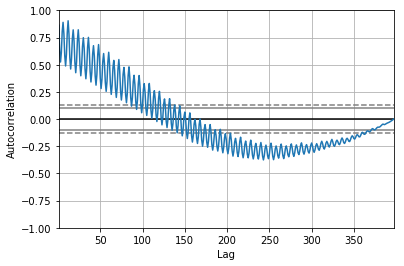

predicted=112.890539, expected=112.153800
predicted=113.744904, expected=108.931200
predicted=97.161840, expected=98.615400
predicted=90.680653, expected=93.613700
predicted=95.465050, expected=97.335900
predicted=111.663226, expected=114.721200
predicted=116.438962, expected=129.404800
Test MSE: 30.771
rmse= 5.547127692108653


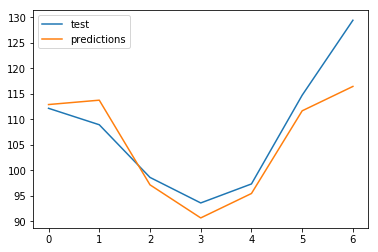

In [20]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
import math



data = read_csv('Electric_Production.csv')

Production_Rate=(data['IPG2211A2N'])


pr_rate=list(Production_Rate)
#print(pr_rate)
        
#pr_rate.plot()
pyplot.show()


autocorrelation_plot(pr_rate)
pyplot.show()

X = Production_Rate.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print('rmse=',math.sqrt(error))
# plot

pyplot.plot(test,label="test")
pyplot.plot(predictions, label="predictions")
pyplot.legend()
pyplot.show()